In [46]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import itertools
plt.style.use('ggplot')

In [47]:
data = pd.read_csv('data_full.csv') 

In [48]:
data.shape

(6953, 8)

In [49]:
data['description'].describe()

count                                                  6953
unique                                                 6708
top       Note: By applying to this position your applic...
freq                                                      9
Name: description, dtype: object

In [50]:
data.isnull().any()

Unnamed: 0     False
position       False
company        False
reviews         True
location       False
state          False
zip_code        True
description    False
dtype: bool

In [51]:
data.head()

,Unnamed: 0,position,company,reviews,location,state,zip_code,description
0,0,Development Director,ALS TDI,NaN,Atlanta,GA,30301.0,Development Director\nALS Therapy Development ...
1,1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,NaN,Atlanta,GA,NaN,"Job Description\n\n""The road that leads to acc..."
2,2,Data Scientist,Xpert Staffing,NaN,Atlanta,GA,NaN,"Growing company located in the Atlanta, GA are..."
3,3,Data Analyst,Operation HOPE,44.0,Atlanta,GA,30303.0,DEPARTMENT: Program OperationsPOSITION LOCATIO...
4,4,Assistant Professor -TT - Signal Processing & ...,Emory University,550.0,Atlanta,GA,NaN,DESCRIPTION\nThe Emory University Department o...


In [52]:
# Group listings for data analysts 

data_analyst = data[data['position'].str.contains("Data Analyst|Data analyst|data analyst|Analyst|analyst]")] 

data_analyst.head()

,Unnamed: 0,position,company,reviews,location,state,zip_code,description
3,3,Data Analyst,Operation HOPE,44.0,Atlanta,GA,30303.0,DEPARTMENT: Program OperationsPOSITION LOCATIO...
8,8,Analyst - CIB Credit Research,SunTrust,3343.0,Atlanta,GA,NaN,Works closely with senior CIB professionals. P...
14,14,Business Intelligence Data Science Analyst - S...,Newell Brands,912.0,Atlanta,GA,NaN,Data Science Analyst– Business Intelligence\nL...
57,57,Senior Research Analyst- Biotech,BNY Mellon,3254.0,Boston,MA,NaN,"About us: The Boston Company, Standish and Mel..."
64,64,Quantitative Analyst Fixed Income,Analytic Recruiting,2.0,Chicago,IL,NaN,Quantitative Analyst Fixed Income\nJob Descrip...


In [53]:
data_analyst.shape

(852, 8)

In [54]:
# Group listings for data scientists

data_scientist = data[data['position'].str.contains("Data Scientist|Data scientist|data scientist|Scientist|scientist")] 

data_scientist.head()

,Unnamed: 0,position,company,reviews,location,state,zip_code,description
1,1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,NaN,Atlanta,GA,NaN,"Job Description\n\n""The road that leads to acc..."
2,2,Data Scientist,Xpert Staffing,NaN,Atlanta,GA,NaN,"Growing company located in the Atlanta, GA are..."
7,7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,899.0,Atlanta,GA,NaN,Overview / Responsibilities\nWood Environment ...
9,9,Senior Associate - Cognitive Data Scientist Na...,KPMG,4494.0,Atlanta,GA,30338.0,Known for being a great place to work and buil...
11,11,Health Scientist III-CPTS,Chenega Corporation,390.0,Atlanta,GA,NaN,"Chenega Professional &amp; Technical Services,..."


In [55]:
data_scientist.shape

(2606, 8)

In [56]:
# Group listings for engineers

engineer = data[data['position'].str.contains("Engineer|engineer|Programmer|programmer|Developer|developer")] 

engineer.head()

,Unnamed: 0,position,company,reviews,location,state,zip_code,description
5,5,Manager of Data Engineering,McKinsey & Company,385.0,Atlanta,GA,30318.0,Qualifications\nBachelor’s degree in Computer ...
7,7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,899.0,Atlanta,GA,NaN,Overview / Responsibilities\nWood Environment ...
16,16,Senior Structural Engineer-Transmission & Dist...,Burns & McDonnell,152.0,Atlanta,GA,30309.0,Description\nExecutes complex assignments requ...
17,17,Senior Mobile Developer (iOS/Android),Perficient,44.0,Atlanta,GA,30338.0,Overview\n\n\n\nAt Perficient you’ll deliver m...
20,20,Senior Electrical Engineer,Burns & McDonnell,152.0,Atlanta,GA,30309.0,Description\nBurns &amp; McDonnell is consider...


In [57]:
engineer.shape

(1500, 8)

In [58]:
# Create an array with the descriptions for each position

analyst_text = data_analyst.description.values
scientist_text = data_scientist.description.values
engineer_text = engineer.description.values


In [59]:
# Skills requirements

# Define a regex search function for Data Analyst

def count_text(patt,text):
    pattern = re.compile(patt)
    count = 0
    for t in text:
        if pattern.search(t):
            count+=1
    return count

In [60]:
# Create a data frame with skills name and regex pattern to search with

# Technical skills

tech_skills = ['R','Python','Hadoop','SQL','Tableau','TensorFlow','Agile','Power BI','Algorithm','Java','Visualization', 'PHP', 'Excel']

tech_skill_patt = ['\WR\W+\s*','(?i)\WPython\W','(?i)\WHadoop\W?','(?i)SQL\w*','(?i)\WTableau\W?',
              "(?i)\WTensorFlow\W?","(?i)\WAgile\W?","(?i)\WPower\s?BI\W?",
              "(?i)\WAlgorithms?\W?",'(?i)Java\w*','(?i)\WVisualization\W?', '(?i)\WPHP\W?', '(?i)\WExcel\W?']

tech_skill_df =pd.DataFrame(
    {"skill": tech_skills,
     "regex_pattern":tech_skill_patt})

In [61]:
# Iterate through the list of skills using the search function created

i = []
for x in tech_skill_df['regex_pattern']:
    i.append(count_text(x,engineer_text))
tech_skill_df['count'] = i
tech_skill_df['ptg'] = round(tech_skill_df['count']/len(engineer_text),2)
tech_skill_df

,skill,regex_pattern,count,ptg
0,R,\WR\W+\s*,286,0.19
1,Python,(?i)\WPython\W,811,0.54
2,Hadoop,(?i)\WHadoop\W?,322,0.21
3,SQL,(?i)SQL\w*,504,0.34
4,Tableau,(?i)\WTableau\W?,58,0.04
5,TensorFlow,(?i)\WTensorFlow\W?,134,0.09
6,Agile,(?i)\WAgile\W?,316,0.21
7,Power BI,(?i)\WPower\s?BI\W?,14,0.01
8,Algorithm,(?i)\WAlgorithms?\W?,478,0.32
9,Java,(?i)Java\w*,626,0.42


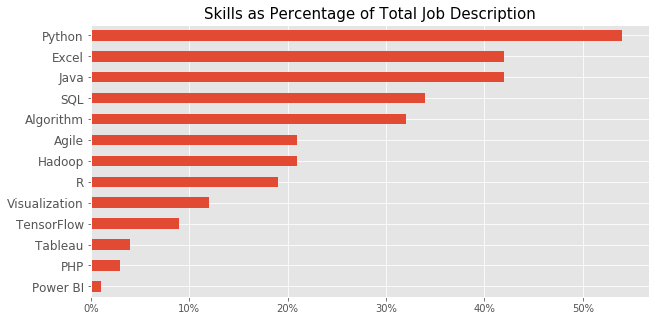

In [62]:
# Plot the skills as a percentage from all listings for Data Analysts 

x = tech_skill_df.sort_values(by = 'ptg')
ax =x['ptg'].plot(kind = "barh",figsize = (10,5))
ax.set_title('Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()

In [63]:
# Soft skills

soft_skills = ['Communication','Teamwork','Research', 'Work ethic', 'Problem solving', 'Independent', 'Presentation', 'Confidence', 'Leadership skills', 'Interpersonal skills', 'Time Management', 'Critical Thinking', 'Adaptability']

soft_skill_patt = ['(?i)\WCommunication\W','(?i)\WTeamwork\W','(?i)\WResearch\W', '(?i)\WWork ethic\W', '(?i)\WProblem solving\W', '(?i)\WIndependent\W', '(?i)\WPresentation\W', '(?i)\WConfidence\W', '(?i)\WLeadership skills\W', '(?i)\WInterpersonal skills\W', '(?i)\WTime Management\W', '(?i)\WCritical Thinking\W', '(?i)\WAdaptability\W']

soft_skill_df = pd.DataFrame(
    {"skill": soft_skills,
     "regex_pattern": soft_skill_patt})

In [64]:
# Iterate through the list of skills using the search function created

j = []
for x in soft_skill_df['regex_pattern']:
    j.append(count_text(x,engineer_text))
soft_skill_df['count'] = j
soft_skill_df['ptg'] = round(soft_skill_df['count']/len(engineer_text),2)
soft_skill_df

,skill,regex_pattern,count,ptg
0,Communication,(?i)\WCommunication\W,716,0.48
1,Teamwork,(?i)\WTeamwork\W,55,0.04
2,Research,(?i)\WResearch\W,622,0.41
3,Work ethic,(?i)\WWork ethic\W,15,0.01
4,Problem solving,(?i)\WProblem solving\W,184,0.12
5,Independent,(?i)\WIndependent\W,72,0.05
6,Presentation,(?i)\WPresentation\W,128,0.09
7,Confidence,(?i)\WConfidence\W,20,0.01
8,Leadership skills,(?i)\WLeadership skills\W,28,0.02
9,Interpersonal skills,(?i)\WInterpersonal skills\W,92,0.06


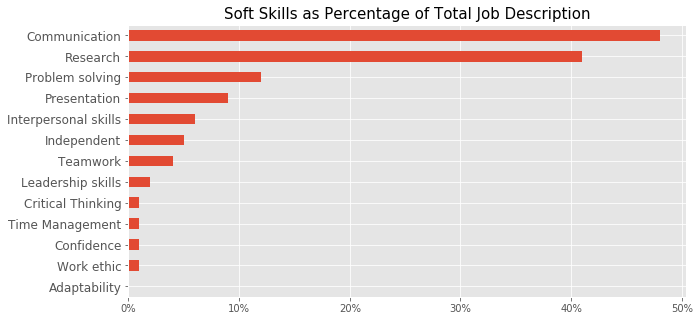

In [65]:
# Plot 

x = soft_skill_df.sort_values(by = 'ptg')
ax =x['ptg'].plot(kind = "barh",figsize = (10,5))
ax.set_title('Soft Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()